In [1]:
from mnist import MNIST
import numpy as np, scipy, seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [3]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1])
X_test  = np.array(TestData[0])
Y_test  = np.array(TestData[1])

the number shoud be 8


/home/scratch.wexleyz_gpu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


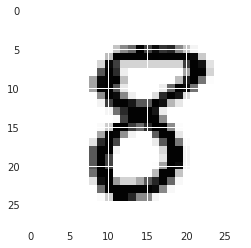

In [4]:
def Visualize(a):
    data = a.reshape((28, 28))
    imshow(data)
Visualize(X_train[333])
print "the number shoud be", Y_train[333]

In [5]:
X_std = StandardScaler().fit_transform(X_train)

/home/scratch.wexleyz_gpu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Test sklearn.decomposition.PCA

In [6]:
def printc(cc):
    sns.palplot(cc)
    print "     " + "      ".join(str(w) for w in xrange(10))

def minist_plot_2d(x, y, label=Y_train, num = 10000, fs=(10, 10), cc = sns.color_palette("Set3", n_colors=10, desat=1)):
    printc(cc)
    fig = plt.figure(figsize=fs)
    plt.scatter(x[:num], y[:num], c=[cc[w] for w in label[:num]], marker='o', s = 7)

def minist_plot_3d(x, y, z, label=Y_train, num = 10000, fs=(10, 10), cc = sns.color_palette("Set3", n_colors=10, desat=1)):
    printc(cc)
    fig = plt.figure(figsize=fs)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:num], y[:num], z[:num], c=[cc[w] for w in label[:num]], marker='o', s = 7)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_std.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_score = pca.explained_variance_ratio_
V = pca.components_
print pca_score, V.shape

[ 0.04677605  0.04143171  0.0381674 ] (3, 60000)


     0      1      2      3      4      5      6      7      8      9


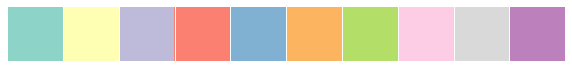

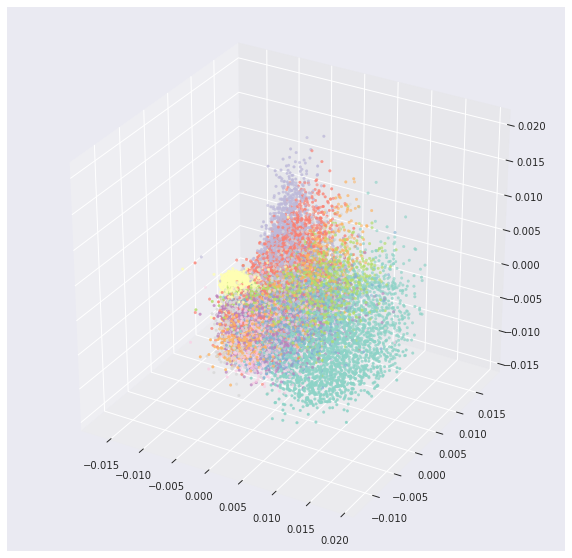

In [9]:
minist_plot_3d(V[0], V[1], V[2], num=30000)

In [10]:
pca = PCA(n_components=2)
pca.fit(X_std.T)
pca_score = pca.explained_variance_ratio_
V = pca.components_

     0      1      2      3      4      5      6      7      8      9


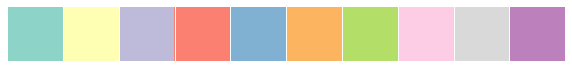

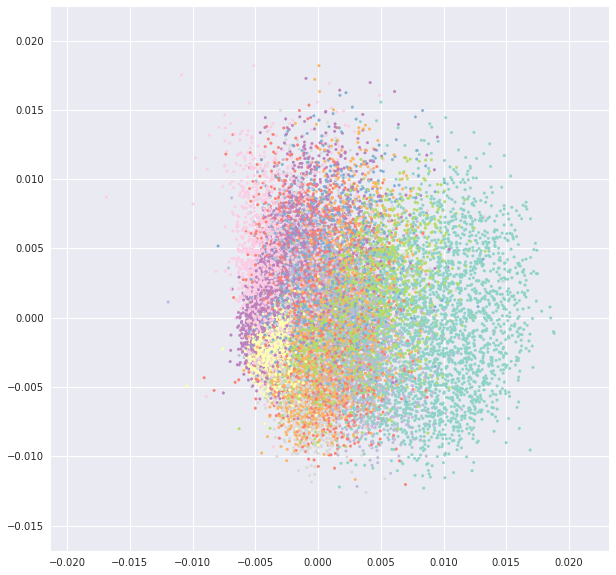

In [11]:
minist_plot_2d(V[0], V[1], num=30000)

Test SVD PCA

In [12]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=3)
print u.shape, s.shape, v.shape

(60000, 3) (3,) (3, 784)


     0      1      2      3      4      5      6      7      8      9


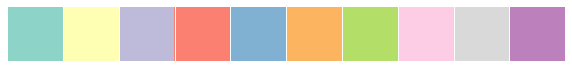

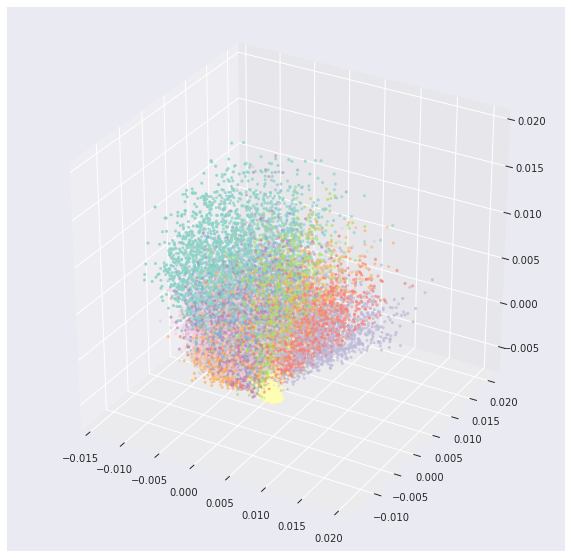

In [14]:
minist_plot_3d(u.T[0], u.T[1], u.T[2], num=30000)

In [15]:
u,s,v = scipy.sparse.linalg.svds(X_std, k=2)
print u.shape, s.shape, v.shape

(60000, 2) (2,) (2, 784)


     0      1      2      3      4      5      6      7      8      9


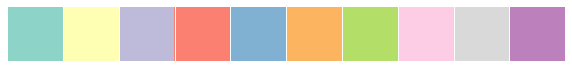

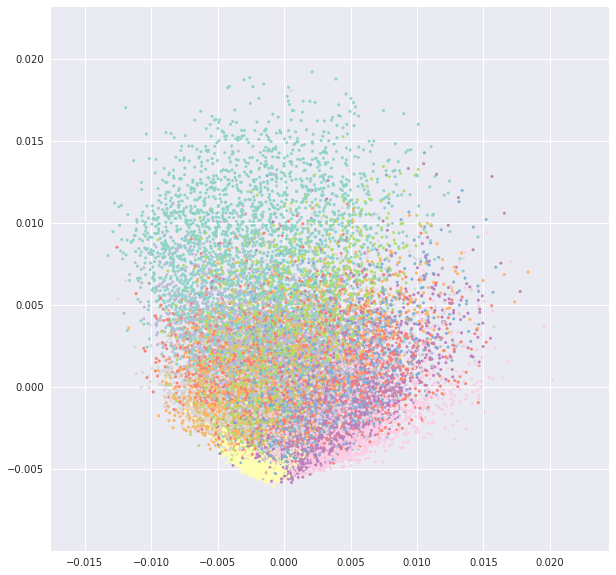

In [17]:
minist_plot_2d(u.T[0], u.T[1], num=30000)

Normal Approach

In [18]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [19]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

temp = sorted([(eig_vals[i], eig_vecs[i]) for i in xrange(len(eig_vals))], key = lambda x: abs(x[0]), reverse = True)
eig_vals = np.array([w[0] for w in temp])
eig_vecs = np.array([w[1] for w in temp])

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

Eigenvalues 
[  4.04876351e+01   2.92416975e+01   2.68118045e+01   2.06866182e+01
   1.80766501e+01   1.57331779e+01   1.37906091e+01   1.25175891e+01
   1.10067953e+01   1.00504971e+01   9.62045779e+00   8.63097356e+00
   7.99159687e+00   7.81488215e+00   7.37553786e+00   7.13058751e+00
   6.71398002e+00   6.60400749e+00   6.40604846e+00   6.23737743e+00
   5.93229172e+00   5.76059855e+00   5.48403364e+00   5.31859721e+00
   5.12873534e+00   4.96062446e+00   4.90533662e+00   4.70843497e+00
   4.52919760e+00   4.39470849e+00   4.27522172e+00   4.21399693e+00
   4.09838079e+00   4.03181137e+00   3.97713624e+00   3.86052409e+00
   3.80864021e+00   3.72563426e+00   3.64393543e+00   3.44169730e+00
   3.41624517e+00   3.36378527e+00   3.25773631e+00   3.23620323e+00
   3.20478100

In [20]:
eig_vecs.shape

(784, 784)

In [21]:
X_transformed = X_std.dot(eig_vecs.T[:3].T)

     0      1      2      3      4      5      6      7      8      9


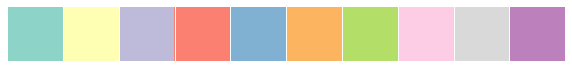

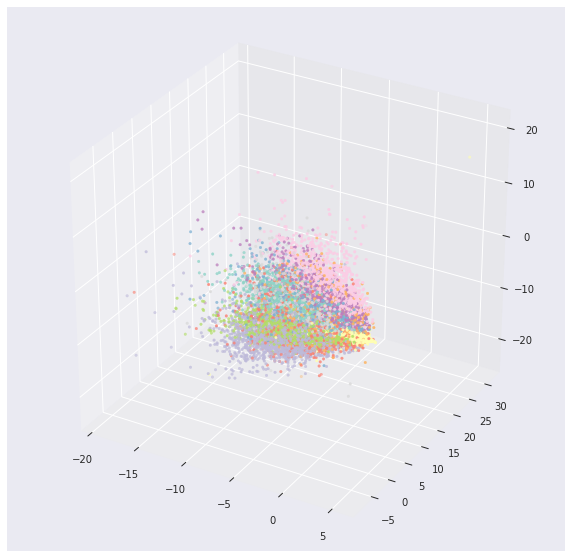

In [23]:
minist_plot_3d(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], num=30000)

In [24]:
X_transformed = X_std.dot(eig_vecs.T[:2].T)

     0      1      2      3      4      5      6      7      8      9


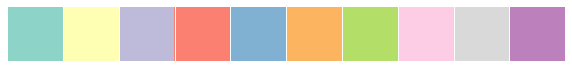

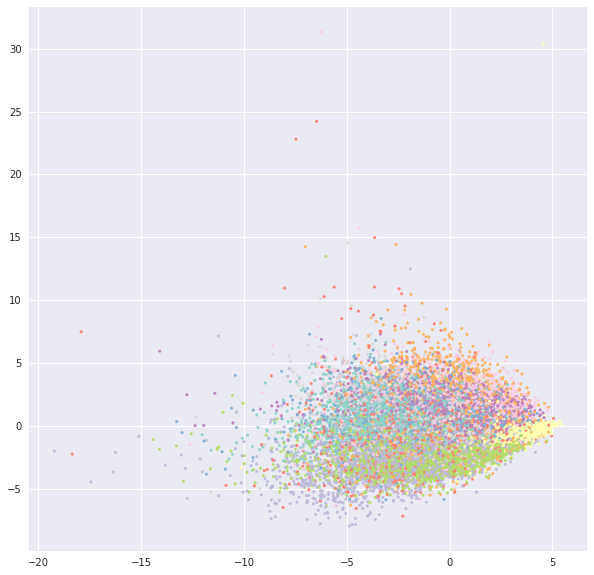

In [25]:
minist_plot_2d(X_transformed[:, 0], X_transformed[:, 1], num=30000)

In [26]:
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
embed = model.fit_transform(X_std[:10000])

     0      1      2      3      4      5      6      7      8      9


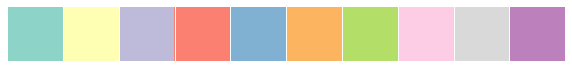

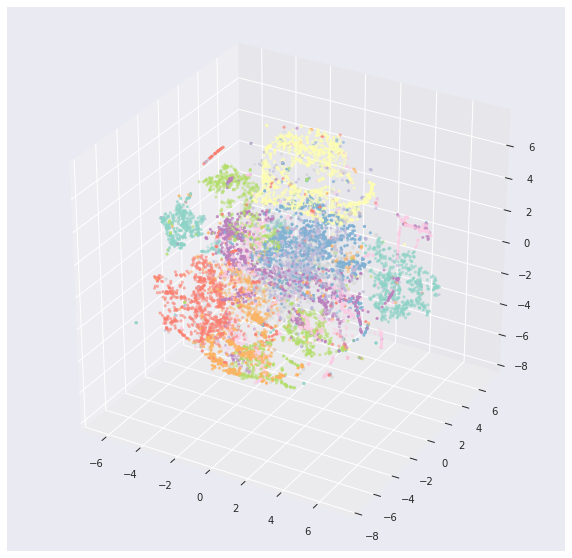

In [27]:
minist_plot_3d(embed[:,0], embed[:,1], embed[:,2])

In [28]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
embed = model.fit_transform(X_std[:10000])

     0      1      2      3      4      5      6      7      8      9


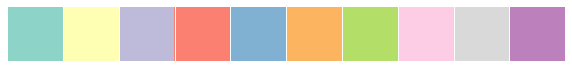

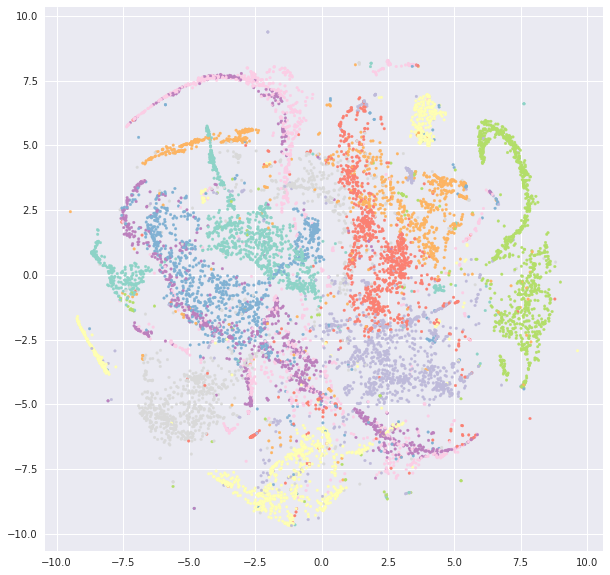

In [29]:
minist_plot_2d(embed[:,0], embed[:,1])

PCA-KNN Part

In [30]:
def pca_cov(X, n=3):
    # Input X should be instance x feature_size
    u,s,v = scipy.sparse.linalg.svds(X_std, k=n)
    # Results are still instance x new_feature_size(n)
    return u

In [31]:
X_all = np.concatenate([X_train, X_test])
X_std = StandardScaler().fit_transform(X_all)

In [32]:
def test_pca(d = 40):
    X_all_now = pca_cov(X_std, n = d)
    X_train_now = X_all_now[:len(X_train)]
    X_test_now = X_all_now[-len(X_test):]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_now, Y_train)
    Results = knn.predict(X_test_now)
    count = 0
    for i in xrange(len(Results)):
        if (Results[i] == Y_test[i]): count += 1
    print 'Accuracy:', count * 100 / float(len(Results)), '%'

In [33]:
test_pca(40)

Accuracy: 95.23 %


In [34]:
test_pca(80)

Accuracy: 95.22 %


In [35]:
test_pca(200)

Accuracy: 93.38 %


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=334)
pca.fit(X_std)
print np.sum(pca.explained_variance_ratio_) 

0.950155151344


In [37]:
test_pca(334)

Accuracy: 88.85 %


LDA Part

     0      1      2      3      4      5      6      7      8      9


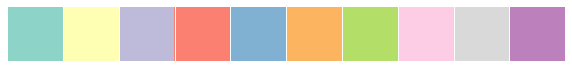

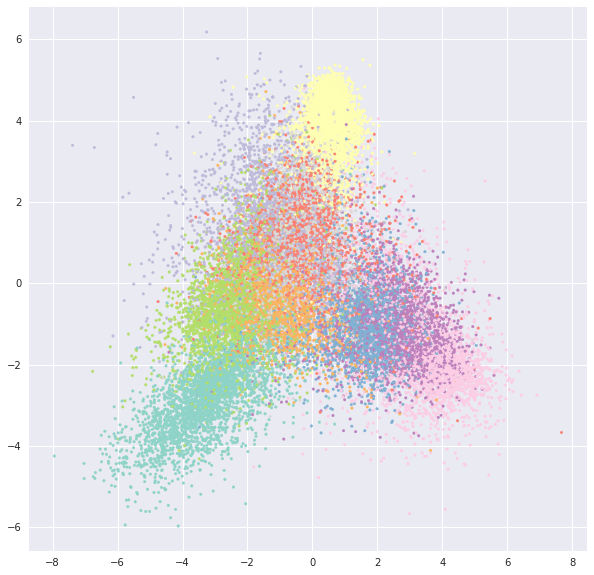

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X_train, Y_train)
minist_plot_2d(X_lda_sklearn[:,0], X_lda_sklearn[:,1], num=30000)

     0      1      2      3      4      5      6      7      8      9


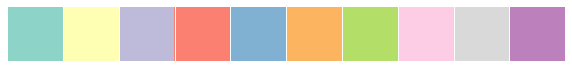

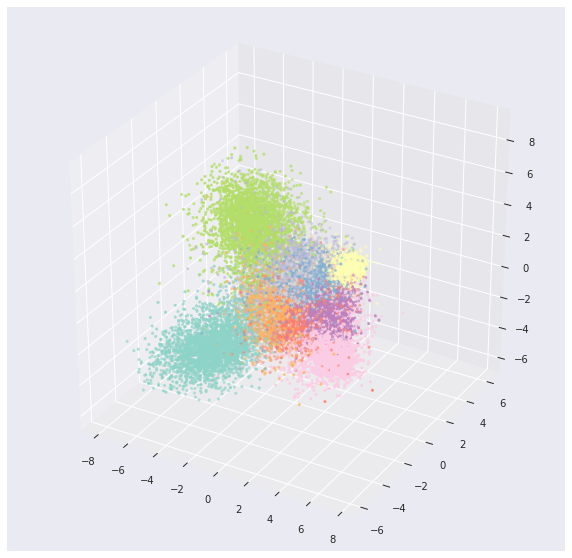

In [57]:
sklearn_lda = LDA(n_components=3)
X_lda_sklearn = sklearn_lda.fit_transform(X_train, Y_train)
minist_plot_3d(X_lda_sklearn[:,0], X_lda_sklearn[:,1], X_lda_sklearn[:,2], num=30000)

In [152]:
Y_all = np.concatenate([Y_train, Y_test])

In [168]:
temp = sorted(zip(X_std, Y_all), key = lambda x: x[1])
X = [[] for i in xrange(10)]
for i in xrange(10):
    X[i] = np.mat([w[0] for w in filter(lambda x:x[1] == i, temp)])

In [207]:
mean_vec = np.array([np.squeeze(np.asarray(np.matrix.mean(w, axis = 0))) for w in X])
print mean_vec.shape

(10, 784)


In [214]:
cov_mat = np.array([np.cov(X[i].T) for i in xrange(10)])
cov_mat.shape

(10, 784, 784)

In [220]:
SW = np.sum(cov_mat, axis = 0)
SW.shape

(784, 784)

In [224]:
mean = np.sum(mean_vec, axis = 0)
mean /= 10.0

In [159]:
flag = False
for k in xrange(10):
    cur = len(X[k])*np.matmul(np.mat(mean_vec[i] - mean).T, np.mat(mean_vec[i] - mean))
    if not flag:
        SB = cur
        flag = True
    else: SB += cur

In [162]:
mat = np.linalg.inv(SW).matmul(SB)

LinAlgError: Singular matrix

In [163]:
SW[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0